# 7. matplotlib

In [1]:
# 그래프를 show 명령어 없이도 바로 보여주도록 만드는 매직 커맨드
# %matplotlib inline : show 명령 없이도 정적으로 그래프 표현
# %matplotlib notebook : show 명령 없이도 동적으로 그래프 표현

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 

### 1. 그래프 시각화

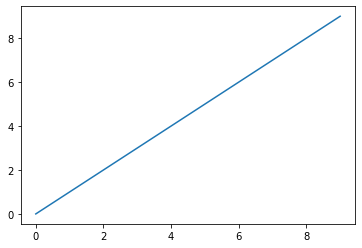

In [2]:
data = np.arange(10)
plt.plot(data)

In [3]:
# figure과 subplot 
# figure : 이미지 전체의 영역을 확보하는 인스턴스
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

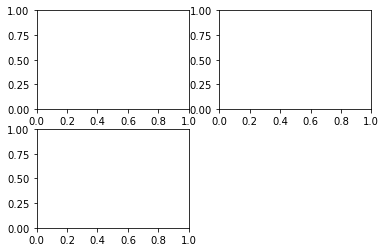

In [4]:
# subplot : (행,렬,들어갈 순서)
ax1 = fig.add_subplot(221) # 2*2 size에서 1번째 자리에 들어갈 축
ax2 = fig.add_subplot(222) # 2번째
ax3 = fig.add_subplot(223) # 3번째
fig

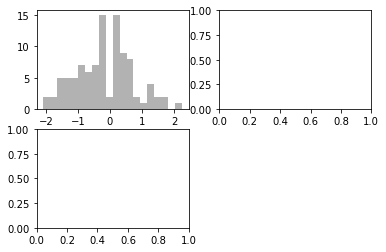

In [5]:
ax1.hist(np.random.randn(100),bins = 20, color='k', alpha = 0.3)
fig

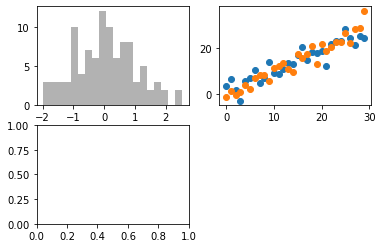

In [30]:
ax2.scatter(np.arange(30),np.arange(30) + 3 * np.random.randn(30))
fig

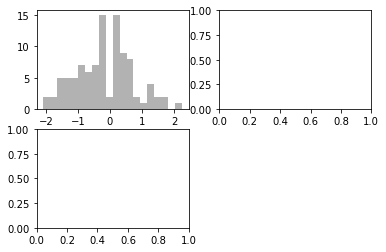

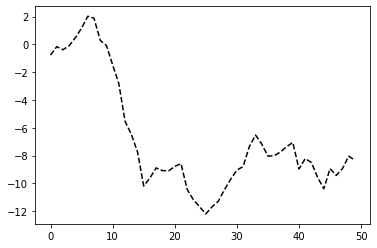

In [6]:
ax3 = plt.plot(np.random.randn(50).cumsum(),'k--')
fig

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

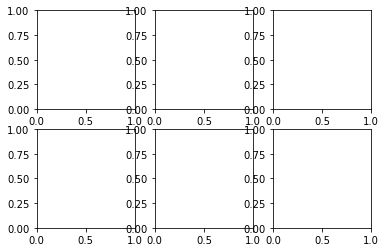

In [35]:
# subplots : figure instance와 axes를 만드는 작업을 한번에 끝내준다. 
fig, axes = plt.subplots(2,3)
axes

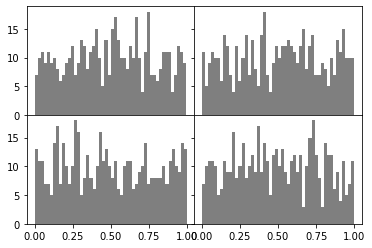

In [38]:
fig, axes = plt.subplots(2,2, sharex = True, sharey = True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.rand(500),bins=50,color='k',alpha = 0.5)
        
# subplots_adjust는 graph간 간격을 조정한다. 
plt.subplots_adjust(wspace= 0, hspace=0)

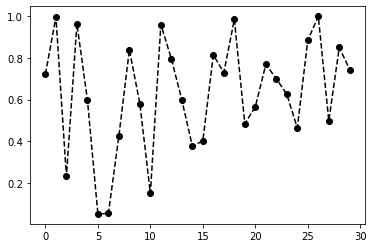

In [39]:
# 색상, 마커, 선 스타일 
plt.plot(np.random.rand(30), 'ko--')

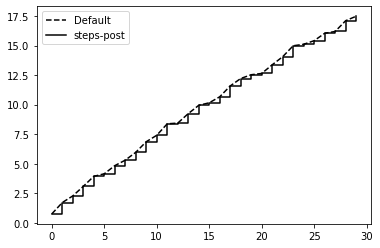

In [40]:
# drawstyle option
data = np.random.rand(30).cumsum()
plt.plot(data, 'k--', label = 'Default')
plt.plot(data,'k-', drawstyle = 'steps-post', label = 'steps-post')

#legend(범례) : 그래프의 label을 보여준다. 
plt.legend(loc = 'best')

Text(0.5, 0, 'stage')

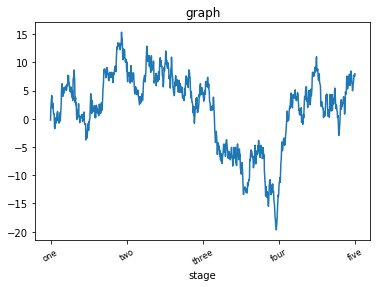

In [51]:
# 제목 축 이름, 눈금, 눈금 이름 설정하기 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
ax.set_xticks([0,250,500,750,1000])
#ax.set_xticklabels(['one','two','three','four','five'], rotation = 30, fontsize = 'small')

# 그래프 제목 설정
ax.set_title('graph')

# x 축 제목 설정
ax.set_xlabel('stage')

In [47]:
# x축 눈금 변경하기
ticks = ax.set_xticks([0,250,500,750,1000])
ax.plot()


[]

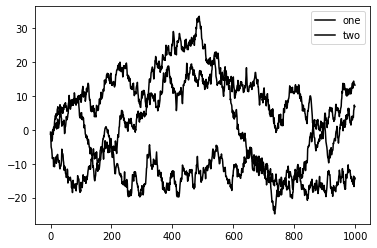

In [53]:
# legend 추가하기 

fig = plt.figure(); ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum(), 'k', label = 'one')
ax.plot(np.random.randn(1000).cumsum(), 'k', label = 'two')
# legend에 포함시키고 싶지 않은 그래프가 있는 경우 label이름을 _nolegend_로 한다.
ax.plot(np.random.randn(1000).cumsum(), 'k', label = '_nolegend_')
ax.legend(loc = 'best')

In [55]:
# 주석과 그림 추가하기 
from datetime import datetime
import pandas as pd

Text(0.5, 1.0, 'important dates in the 2008-2009 financial crisis')

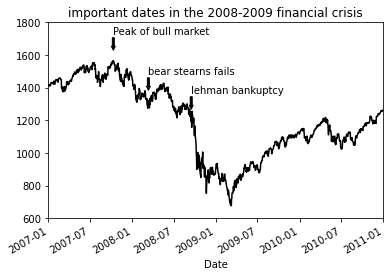

In [60]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data = pd.read_csv('examples/spx.csv',index_col=0, parse_dates = True)
spx = data['SPX']

spx.plot(ax = ax, style = 'k-')


# 표시할 3가지 주석 
crisis_data = [
    (datetime(2007,10,11),'Peak of bull market'),
    (datetime(2008,3,12),'bear stearns fails'),
    (datetime(2008,9,15), 'lehman bankuptcy')
]

# annotate함수를 이용해서 표시, xy, xytext option을 통해 텍스트의 위치를 정한다.
# data에 날짜 값이 있을 수도 있고 없을 수도 있음으로 asof()함수를 사용하여 결측치가 없는 이전의 값을 가져온다. 

for date, label in crisis_data:
    ax.annotate(label, xy = (date,spx.asof(date) + 75),
                xytext= (date, spx.asof(date) + 225),
                arrowprops = dict(facecolor = 'black',headwidth = 4, width = 2,headlength = 4),
                horizontalalignment = 'left',verticalalignment = 'top')

# set_xlim, set_ylim : 해당 영역 그래프만 잘라서 보여줌 
ax.set_xlim(['1/1/2007','1,1,2011'])
ax.set_ylim([600,1800])

ax.set_title('important dates in the 2008-2009 financial crisis')

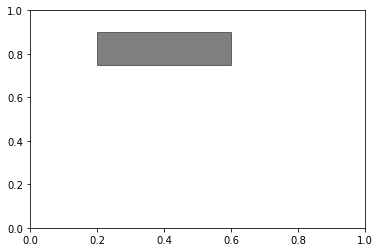

In [63]:
# 일반적인 도형 그리기 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
rect = plt.Rectangle((0.2,0.75),0.4,0.15,color = 'k',alpha=0.5)
ax.add_patch(rect)


In [64]:
# 그래프 저장하기 
# dpi : 해상도 옵션,
plt.savefig('examples/figpath.svg',dpi= 600,bbox_inchs='tight')

C:\Users\Marvel\AppData\Local\Temp\ipykernel_6972\2948563684.py:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inchs" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('examples/figpath.svg',dpi= 600,bbox_inchs='tight')


<Figure size 432x288 with 0 Axes>

In [ ]:
# matplotlib 전역 설정 : rc() method 
plt.rc('figure', figsize = (10,10)) 

# 설정과 옵션 모두 저장할 수 있다. 
